# Data Wrangling Project

## Gathering Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from io import StringIO
import tweepy as tp
import json
import seaborn as sb

Define: Load provided csv file into a dataframe

In [2]:
#code
df= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#copying
archive= df.copy()

In [4]:
#test
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#test
archive.shape

(2356, 17)

In [6]:
#test
archive.head

<bound method NDFrame.head of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689          

Define: Use the requests library to programatically download the data

In [7]:
#code
images= requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
    
images=StringIO(images.text)

img= pd.read_csv(images, sep="\t")
#copy
image= img.copy()
#test 
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Define: load the file 'image-predictions.tsv' into a dataframe 

In [8]:
#code
df2=pd.read_csv('image-predictions.tsv', delimiter= '\t', encoding = 'utf-8')
#copy
df4= df2.copy()

In [9]:
#test
df4.info

<bound method DataFrame.info of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    66607119322150

Define: Use Tweepy (Twitter's API) to extract the favorite

In [10]:
#Setting up API 
consumer_key= 'DyyXXwTUCQ8YNb7gPWApcnqGP'
consumer_secret= 'UJtetZf3yJR2GqdBs6GISqqxFpa7mJENobIfZv4O3VuBTz94zi' 
access_token= '1084429021998432257-cuWaI6usQHFN7MXXDHj0ktk56ukZdX'
access_token_secret='VbU0LxGKo4qAIhoUtxHsXtWxyZ8XnWeIgfp72SPDXlCWE'

In [11]:
auth= tp.OAuthHandler(consumer_key, consumer_secret)
api = tp.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)

Define: Create a list to load the data from the API into and a list for errors to be written into. 

In [12]:
#Code
df_list= []
errors= []
for id in df2.tweet_id:
    try:
        page= api.get_status(id, tweet_mode= 'extended')
        favorites=page.favorite_count
        retweets=page.retweet_count
        date_time=page.created_at
        df_list.append({'tweet_id':int(id),
                       'favorites': int(favorites),
                       'retweets':int(retweets),
                       'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(id)+ "_" + str(e))
        errors.append(id)
        

680055455951884288_[{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 743
754011816964026368_[{'code': 144, 'message': 'No status found with that ID.'}]
779123168116150273_[{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832_[{'code': 144, 'message': 'No status found with that ID.'}]
829374341691346946_[{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 740
837012587749474308_[{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778_[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648_[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984_[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560_[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320_[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745_[{'code': 144, 'message': 'No status

In [13]:
#test
df_list

[{'tweet_id': 666020888022790149,
  'favorites': 2461,
  'retweets': 473,
  'date_time': Timestamp('2015-11-15 22:32:08')},
 {'tweet_id': 666029285002620928,
  'favorites': 121,
  'retweets': 44,
  'date_time': Timestamp('2015-11-15 23:05:30')},
 {'tweet_id': 666033412701032449,
  'favorites': 118,
  'retweets': 43,
  'date_time': Timestamp('2015-11-15 23:21:54')},
 {'tweet_id': 666044226329800704,
  'favorites': 279,
  'retweets': 134,
  'date_time': Timestamp('2015-11-16 00:04:52')},
 {'tweet_id': 666049248165822465,
  'favorites': 99,
  'retweets': 41,
  'date_time': Timestamp('2015-11-16 00:24:50')},
 {'tweet_id': 666050758794694657,
  'favorites': 126,
  'retweets': 55,
  'date_time': Timestamp('2015-11-16 00:30:50')},
 {'tweet_id': 666051853826850816,
  'favorites': 1152,
  'retweets': 795,
  'date_time': Timestamp('2015-11-16 00:35:11')},
 {'tweet_id': 666055525042405380,
  'favorites': 414,
  'retweets': 224,
  'date_time': Timestamp('2015-11-16 00:49:46')},
 {'tweet_id': 66605

Define: Create a third list to write the errors from the error list to 

In [14]:
#code
error_list2= []
for e in errors:
    try:
        favorites=page.favorite_count
        retweets=page.retweet_count
        date_time=page['created_at']
        df_list.append({'tweet_id':int(tweet_id),
                       'favorites': int(favorites),
                       'retweets':int(retweets),
                       'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(id)+ "_" + str(e))
        error_list2.append(id)

892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable
892420643555336193_'Status' object is not subscriptable


In [15]:
#test
error_list2

[892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193]

Define: use JSON to write the data from tweet_json.txt to a page

In [16]:
#code
with open('tweet_json.txt', encoding='utf-8') as file:
    for id in df2['tweet_id']:
        try:
            file.write(json.dumps(page))
            file.write('\n')
        except: pass
file.close
            

<function TextIOWrapper.close()>

In [17]:
#test 
page

Status(_api=<tweepy.api.API object at 0x7f2e2aa1ec88>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540,

Define: Convert list into a dataframe

In [18]:
#code
df3= pd.DataFrame(df_list)
df5= df3.copy()

In [19]:
#test
df5

,date_time,favorites,retweets,tweet_id
0,2015-11-15 22:32:08,2461,473,666020888022790149
1,2015-11-15 23:05:30,121,44,666029285002620928
2,2015-11-15 23:21:54,118,43,666033412701032449
3,2015-11-16 00:04:52,279,134,666044226329800704
4,2015-11-16 00:24:50,99,41,666049248165822465
5,2015-11-16 00:30:50,126,55,666050758794694657
6,2015-11-16 00:35:11,1152,795,666051853826850816
7,2015-11-16 00:49:46,414,224,666055525042405380
8,2015-11-16 00:55:59,274,129,666057090499244032
9,2015-11-16 01:01:59,107,55,666058600524156928


Define: Merge the dataframes together (Tidiness Issue #2)

In [20]:
#code
df_master=df4.merge(df5)

In [21]:
#test for first merge
df_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date_time,favorites,retweets
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2015-11-15 22:32:08,2461,473
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30,121,44
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54,118,43
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2015-11-16 00:04:52,279,134
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,2015-11-16 00:24:50,99,41


In [22]:
#code, cont.
main2= df_master.merge(archive)
#test for second merge
main2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


# Assessing data 

In [23]:
#testing
main2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 31 columns):
tweet_id                      2061 non-null int64
jpg_url                       2061 non-null object
img_num                       2061 non-null int64
p1                            2061 non-null object
p1_conf                       2061 non-null float64
p1_dog                        2061 non-null bool
p2                            2061 non-null object
p2_conf                       2061 non-null float64
p2_dog                        2061 non-null bool
p3                            2061 non-null object
p3_conf                       2061 non-null float64
p3_dog                        2061 non-null bool
date_time                     2061 non-null datetime64[ns]
favorites                     2061 non-null int64
retweets                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                  

In [24]:
#testing
main2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.061000e+03,2061.000000,2061.000000,2.061000e+03,2.061000e+03,2061.000000,2061.000000,2.300000e+01,2.300000e+01,7.400000e+01,7.400000e+01,2061.000000,2061.000000
mean,7.378612e+17,1.203785,0.594270,1.346576e-01,6.040991e-02,8115.367297,2645.837943,6.978112e+17,4.196984e+09,7.619394e+17,1.064138e+16,12.262494,10.514799
std,6.755694e+16,0.562765,0.271183,1.006952e-01,5.097150e-02,12258.474033,4625.189821,4.359384e+16,0.000000e+00,5.800000e+16,9.154057e+16,40.818203,7.201294
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000
25%,6.762636e+17,1.000000,0.363272,5.387110e-02,1.624560e-02,1546.000000,565.000000,6.732411e+17,4.196984e+09,7.117707e+17,4.196984e+09,10.000000,10.000000
50%,7.113638e+17,1.000000,0.587764,1.181810e-01,4.947150e-02,3570.000000,1249.000000,6.757073e+17,4.196984e+09,7.755992e+17,4.196984e+09,11.000000,10.000000
75%,7.928838e+17,1.000000,0.843911,1.955730e-01,9.219820e-02,10133.000000,3037.000000,7.031489e+17,4.196984e+09,7.958815e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,159197.000000,79432.000000,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000


In [25]:
#testing
main2.retweets.describe()

count     2061.000000
mean      2645.837943
std       4625.189821
min         11.000000
25%        565.000000
50%       1249.000000
75%       3037.000000
max      79432.000000
Name: retweets, dtype: float64

In [26]:
#reviewing head of table to asssess for issues
main2.head(10)
#noting that name column has two quality issues:
#1. name= None
#2. name= a, an, etc. 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [27]:
#Viewing number of predictions for each breed
main2['p1'].value_counts()[:10]

golden_retriever      150
Labrador_retriever     98
Pembroke               88
Chihuahua              81
pug                    57
chow                   44
Samoyed                42
Pomeranian             38
toy_poodle             38
malamute               30
Name: p1, dtype: int64

In [28]:
#noting denominators other than 10 
main2['rating_denominator'].unique()

array([ 10,   2,  80, 120,  11, 110, 130,  40,  50,  90,  20, 170, 150,
         7,  70])

In [29]:
#noting numerators >15 
main2['rating_numerator'].unique()

array([   8,    7,    9,    6,    5,   10,    2,   11,    1,    3,   12,
          4,   13,  420,   88,  144,   26,  121,  143,   14,   44,   60,
         45,   80,   99,   50,  204,    0, 1776,  165,   27,   75,   24,
         84,   15])

## Quality Issues:
1. tweet_id should be a string
2. duplications of tweet_id
3. 'None' instead of NA in name column
4. retweets included in the data set
5. replies to tweets included in data set 
6. numerators greater than 15
7. denominators other than 10 
8. a, an, the listed as names

## Tidiness Issues
1. Dog Stage is spread across columns
2. Data is spread across three tables
3. Unnecessary columns

# Cleaning Data

## Quality Issues

1. Define: Change tweet_id to a string

In [30]:
#code
main2.tweet_id= main2.tweet_id.astype(str)

In [31]:
#no test needed here

2. Define: Get rid of duplicated id's

In [32]:
#code
main2 = main2[ ~main2.tweet_id.duplicated() ]

In [33]:
#test
len(main2)

2061

3. Define: Change 'none' for name to 'NaN'

In [34]:
#code
main2['name']= main2['name'].replace('None', np.nan)

In [35]:
#test
main2.name

0            NaN
1              a
2              a
3              a
4            NaN
5              a
6             an
7              a
8              a
9            the
10           the
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20            an
21             a
22            an
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28             a
29         quite
          ...   
2031     Waffles
2032      Roscoe
2033       Derek
2034      Mingus
2035        Maya
2036         NaN
2037         NaN
2038      Canela
2039        such
2040     Jeffrey
2041      Gerald
2042     Ralphus
2043        Zeke
2044         Jim
2045      Oliver
2046      Stuart
2047         Ted
2048         NaN
2049       Bruno
2050        Koda
2051      Cassie
2052        Zoey
2053         NaN
2054         Jax
2055         NaN
2056    Franklin
2057       Darla
2058      Arch

4. Define: Delete retweets

In [36]:
#code
main2= main2[pd.isnull(main2.retweeted_status_id)]

In [37]:
#test
len(main2)

1987

5. Define: Delete replies

In [38]:
main2= main2[pd.isnull(main2.in_reply_to_status_id)]

In [39]:
main2= main2[pd.isnull(main2.in_reply_to_user_id)]

In [40]:
#test
len(main2)

1964

6. Define: Delete entries with abnormal numerators.

In [41]:
#code
#Searching for index numbers of abnormal numerators
main2.query('rating_numerator == "501"')
main2.query('rating_numerator == "277"')
main2.query('rating_numerator == "420"')
main2.query('rating_numerator == "144"')
main2.query('rating_numerator == "121"')
main2.query('rating_numerator == "44"')
main2.query('rating_numerator == "60"')
main2.query('rating_numerator == "45"')
main2.query('rating_numerator == "80"')
main2.query('rating_numerator == "50"')
main2.query('rating_numerator == "204"')
main2.query('rating_numerator == "1776"')
main2.query('rating_numerator == "165"')
main2.query('rating_numerator == "27"')
main2.query('rating_numerator == "75"')
main2.query('rating_numerator == "24"')
main2.query('rating_numerator == "84"')
main2.query('rating_numerator == "0"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1819,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,...,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,None,None,None,None


In [42]:
#code, cont.
#using indices to drop the rows with abnormal numerators
main2= main2.drop(index= 501)
main2= main2.drop(index= 277)
main2= main2.drop(index= 420)
main2= main2.drop(index= 560)
main2= main2.drop(index= 691)
main2= main2.drop(index= 864)
main2= main2.drop(index= 940)
main2= main2.drop(index= 1006)
main2= main2.drop(index= 1024)
main2= main2.drop(index= 1049)
main2= main2.drop(index= 1070)
main2= main2.drop(index= 1147)
main2= main2.drop(index= 1269)
main2= main2.drop(index= 1336)
main2= main2.drop(index= 1457)
main2= main2.drop(index= 1512)
main2= main2.drop(index= 1654)
main2= main2.drop(index= 1724)
main2= main2.drop(index= 1819)
main2= main2.drop(index= 620)

In [43]:
#test
len(main2)

1944

7. Define: Delete rows with dominators other than 10

In [44]:
#code, noting indices 
main2[main2['rating_denominator'] !=10]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,...,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
666,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,...,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1104,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,...,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,None,None,None,None
1195,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,...,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,None,None,None,None


In [45]:
#using indices to drop rows with denominators other than 10 
main2= main2.drop(index= 20)
main2= main2.drop(index= 666)
main2= main2.drop(index= 1104)
main2= main2.drop(index= 1195)

In [46]:
#test
len(main2)

1940

8. Define: Deleting a, an, the, from name column

In [47]:
#code
main2['name'] = main2['name'].replace(['a', 'an', 'the'], np.NaN)

In [48]:
#test
main2['name'].value_counts()

Oliver       10
Cooper       10
Charlie      10
Lucy          9
Tucker        9
Penny         9
Winston       8
Sadie         8
Daisy         7
Lola          7
Toby          7
Bella         6
Bo            6
Jax           6
Stanley       6
Koda          6
Dave          5
Leo           5
Buddy         5
Rusty         5
Milo          5
Scout         5
Bailey        5
Louis         5
Chester       5
Oscar         5
George        4
Larry         4
Bentley       4
Dexter        4
             ..
not           1
Hamrick       1
Arlen         1
Dietrich      1
Lassie        1
Kial          1
Hercules      1
Zoe           1
Kenny         1
Craig         1
Damon         1
Obie          1
Devón         1
Brandy        1
Harper        1
Tanner        1
Charl         1
Kloey         1
Jersey        1
Glacier       1
Brockly       1
Humphrey      1
Bert          1
Andy          1
Eugene        1
Obi           1
Loomis        1
DayZ          1
Genevieve     1
Arnold        1
Name: name, Length: 925,

9. Define: Edit dog breed column so that everything is lowercase and dashes are removed

In [49]:
#code
main2['p1'] = main2['p1'].astype('str')
main2['p1'] = main2['p1'].str.lower().str.replace('_', ' ').str.replace('-', ' ')
main2['p1'] = main2['p1'].replace('nan', np.nan)

In [50]:
#test
main2.p1

0            welsh springer spaniel
1                           redbone
2                   german shepherd
3               rhodesian ridgeback
4                miniature pinscher
5              bernese mountain dog
6                        box turtle
7                              chow
8                     shopping cart
9                  miniature poodle
10                 golden retriever
11                    gordon setter
12                     walker hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english setter
17                              hen
18                 desktop computer
19                italian greyhound
21                 three toed sloth
22                               ox
23                 golden retriever
24                         malamute
25                       guinea pig
26      soft coated wheaten terrier
27                        chihuahua
28          black and tan co

## Tidiness Issues

In [51]:
#creating new column to merge data from columns 'doggo', 'floofer', 'pupper', 'puppo'

main2['stage']= 0
main2['stage'] = ['doggo' if 'doggo' in i
                     else 'pupper' if 'pupper' in i
                     else 'floofer' if 'floofer' in i
                     else 'puppo' if 'puppo' in i
                     else np.nan for i in main2['text'].str.lower()]
#changing into categorical
main2['stage'] = main2['stage'].astype('category')


In [52]:
#checking work 
main2['stage'].value_counts()

pupper     217
doggo       77
puppo       26
floofer      7
Name: stage, dtype: int64

#2. Cleaned in earlier code. Data was spread among 3 tables. I first joined df2 and df3. After that I joined df to get my final dataframe with all of the acquired data in it.  

In [53]:
#Viewing columns to sort 
main2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date_time',
       'favorites', 'retweets', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'stage'],
      dtype='object')

In [54]:
#3. Dropping unnecessary columns to make data more readable
main2 = main2.drop(columns= ['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo', 'retweeted_status_user_id'])
main2.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,date_time,favorites,retweets,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh springer spaniel,0.465074,True,2015-11-15 22:32:08,2461,473,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,2015-11-15 23:05:30,121,44,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,True,2015-11-15 23:21:54,118,43,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,True,2015-11-16 00:04:52,279,134,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,2015-11-16 00:24:50,99,41,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN


In [55]:
#checking to make sure columns were dropped
main2.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'date_time',
       'favorites', 'retweets', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

In [56]:
#dropping another column
main2 = main2.drop(columns= ['p1_dog'])
main2.head()

,tweet_id,jpg_url,p1,p1_conf,date_time,favorites,retweets,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh springer spaniel,0.465074,2015-11-15 22:32:08,2461,473,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,2015-11-15 23:05:30,121,44,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,2015-11-15 23:21:54,118,43,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,2015-11-16 00:04:52,279,134,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,2015-11-16 00:24:50,99,41,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN


In [57]:
#checking for any other unneccessary columns.
main2.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'date_time', 'favorites',
       'retweets', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

In [58]:
main2.head()

,tweet_id,jpg_url,p1,p1_conf,date_time,favorites,retweets,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh springer spaniel,0.465074,2015-11-15 22:32:08,2461,473,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,2015-11-15 23:05:30,121,44,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,2015-11-15 23:21:54,118,43,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,2015-11-16 00:04:52,279,134,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,2015-11-16 00:24:50,99,41,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN


In [59]:
#Storing end dataframe
main2.to_csv('twitter_archive_master.csv', index= False)

# Insights and visualization

In [60]:
main2['retweets'].describe()

count     1940.000000
mean      2516.113918
std       4509.815061
min         11.000000
25%        559.750000
50%       1213.000000
75%       2875.250000
max      79432.000000
Name: retweets, dtype: float64

In [61]:
main2.query('retweets == "79445"')

,tweet_id,jpg_url,p1,p1_conf,date_time,favorites,retweets,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


Insight 1. The post with the most retweets is a labrador retriever. Labrador retrievers are also the mode of the predictions. 

In [62]:
#searching for post with lowest amount of retweets
main2.query('retweets == "11"')

,tweet_id,jpg_url,p1,p1_conf,date_time,favorites,retweets,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
16,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,english setter,0.298617,2015-11-16 03:55:04,73,11,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,NaN,NaN


In [63]:
#searching for english setters
main2.query('p1 == "english setter"')


,tweet_id,jpg_url,p1,p1_conf,date_time,favorites,retweets,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
16,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,english setter,0.298617,2015-11-16 03:55:04,73,11,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,NaN,NaN
46,666804364988780544,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,english setter,0.328792,2015-11-18 02:25:23,225,86,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,NaN
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,english setter,0.696568,2015-12-06 04:34:25,1424,659,2015-12-06 04:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steve. He was just relaxing in hot tub...,https://twitter.com/dog_rates/status/673359818...,8,10,Steve,NaN
541,677187300187611136,https://pbs.twimg.com/media/CWXaQMBWcAAATDi.jpg,english setter,0.282396,2015-12-16 18:03:28,2755,924,2015-12-16 18:03:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a Byzantine Rigatoni. Very aerodyn...,https://twitter.com/dog_rates/status/677187300...,9,10,NaN,NaN
664,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,english setter,0.947198,2016-01-01 02:29:49,1536,445,2016-01-01 02:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Taco. He's a speckled Garnier Fructis. Lo...,https://twitter.com/dog_rates/status/682750546...,9,10,Taco,NaN
1149,732005617171337216,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,english setter,0.677408,2016-05-16 00:31:53,15103,5491,2016-05-16 00:31:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Larry. He has no self control. Tongue ...,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,NaN
1749,824663926340194305,https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg,english setter,0.526488,2017-01-26 17:02:56,10374,1798,2017-01-26 17:02:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. Named after the volleyball. He...,https://twitter.com/dog_rates/status/824663926...,13,10,Wilson,NaN


Insight 2. The post with the least amount of retweets is an english setter. It is not the only one in the data set. The average number of retweets for an English Setter is 1,346. That means that this post, with only 11 retweets, is an outlier. 

In [64]:
#getting information on the ratings
main2['rating_numerator'].describe()


count    1940.000000
mean       10.536598
std         2.162840
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [65]:
ten= main2.query('rating_numerator == "10"')
len(ten)

416

In [66]:
eleven= main2.query('rating_numerator == "11"')
len(eleven)

392

In [67]:
twelve= main2.query('rating_numerator == "12"')
len(twelve)

443

In [68]:
thirteen= main2.query('rating_numerator == "13"')
len(thirteen)

249

In [69]:
fourteen= main2.query('rating_numerator == "14"')
len(fourteen)

33

Insight 3. The most frequently occurring numerator is 12. On either side of it, the frequencies go down like a bell curve. The numerator 10, however, has a high frequency. 13/10 is a common rating, but generally the highest rating they give. Few dogs made 14/10.

## Visualization

In [70]:
main2['favorites'].describe()

count      1940.000000
mean       8465.086082
std       12461.367117
min          73.000000
25%        1802.750000
50%        3816.500000
75%       10544.250000
max      159197.000000
Name: favorites, dtype: float64

Text(0.5,1,'Favorite Count vs Rating')

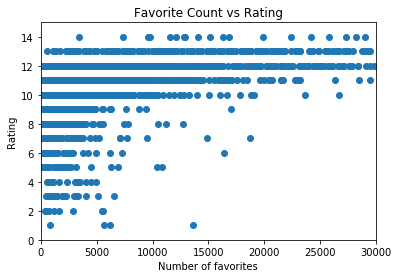

In [71]:
# the distribution of favorites on a histogram
favorites2= main2['favorites']
rating_numerator2= main2['rating_numerator']
plt.scatter(x= favorites2, y=rating_numerator2)
plt.xlim(0, 30000)
plt.ylim(0, 15)
plt.xlabel('Number of favorites')
plt.ylabel('Rating')
plt.title('Favorite Count vs Rating')

The above scatterplot suggests a positive correlation between the rating a dog receives and the number of favorites on the tweet.

# Reports

In [72]:
#installing a pdf reader 
!pip install PyPDF2

    100% |████████████████████████████████| 81kB 3.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for PyPDF2 ... done
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [73]:
#reading in pdf
from PyPDF2 import PdfFileReader
wrangle_report= PdfFileReader('wrangle_report.pdf')

resources: https://bekleydata.com/wp-content/uploads/files/wrangle_act.html

https://a-chong.github.io/data_wrangling_dog_ratings.html

https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-index-labels/